# Recognizing Handwritten Digits using Scikit-Learn

MNIST dataset: https://en.wikipedia.org/wiki/MNIST_database

* 28x28 (784 pixels total) images of handwritten digits
* each image has a label 0-9
* 70,000 total images & labels
* our goal is to correctly guess the label when we can only see pixel data

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_mldata

%matplotlib inline 

mnist = fetch_mldata('MNIST original')

Showing image  16379
Label:  2.0


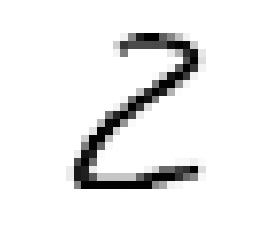

In [27]:
# print random image from the dataset
rand_index = np.random.randint(0, 70000)
data = mnist['data']
target = mnist['target']
print('Showing image ', rand_index)
plt.imshow(data[rand_index].reshape(28,28), cmap='Greys')
plt.axis('off')
print('Label: ', target[rand_index])

# Machine Learning Rundown

"Machine Learning is the science (and art) of programming computers so they can *learn from data.*"

* Aurélien Géron, *Hands-On Machine Learning with Scikit-Learn & Tensorflow*

**Some useful resources**

* Scikit-Learn's introduction to machine learning: http://scikit-learn.org/stable/tutorial/basic/tutorial.html
* MIT OpenCourseWare: https://www.youtube.com/watch?v=h0e2HAPTGF4
* kaggle - website with lots of datasets and frequent ML competitions! https://www.kaggle.com/datasets

**Example: Spam-filter**

* Learns to flag spam from given examples of spam emails and regular, "ham", emails
* This set of example emails is called the *training set*
* Each email in the training set is called an *instance*
* Each instance contains *data* (contents of the email) and a *target* ('spam' or 'ham')
* Each point of data within an instance is a *feature*
* For training purposes, we separate the data and target

**Math notation**

* Uppercase Bold denotes matrices
* lowercase bold denotes vectors
* Italics denotes scalars

We denote data portion of our dataset (no labels) as a matrix, $\mathbf{X}$

* $\mathbf{X}$ has $n$ rows (instances) and $m$ columns (features)

The i-th row of the matrix is an instance, $\mathbf{x}_i$

The j-th element of the i-th row is the value of one feature for a given instance, denoted $x_{i,j}$

The target vector contains a label for each instance. It's denoted $\mathbf{y}$

The i-th element of the target vector is a label for a single instance, $y_i$

* Sometimes our data doesn't have labels. When we have labels for training, it's called *Supervised Learning*. When we don't, it's *Unsupervised Learning.* We'll stick to Supervised Learning for now.
* In practice, we split the given dataset into a *Training Set* and *Test Set*, so we can evaluate our models after we train them.
* It is *very important* that we do not let our models see the test data during training! Our goal is not to memorize the training data, but to create a model capable of classifyig new data.

Our model is a function, $h$, which takes in an instance, $\mathbf{x}_i$, and gives us a predicted label, $\hat{y_i}$

$$h(\mathbf{x}_i) = \hat{y_i}$$

if $\hat{y_i} = y_i$, then our model guessed the label perfectly for the i-th instance

In [3]:
X = mnist['data']
y = mnist['target']
# 784 features (pixels), 70,000 instances (images)
print(X.shape, y.shape)
# 60,000 for training, 10,000 for testing
X_train, X_test = X[:60000], X[60000:]
y_train, y_test = y[:60000], y[60000:]

(70000, 784) (70000,)


# Binary Classifier

Easy starting point. Output is True or False (in the class, or not in the class)

In this case, we'll recognize whether a digit is 5.

In [4]:
# First, we need to restructure our labels
y_train_5 = (y_train == 5) 
y_test_5 = (y_test == 5)
# now, instead of digits 0-9, we have 0's for 'not 5' and 1's for '5' - Perfect!

# Scikit-Learn

* list of classification models: http://scikit-learn.org/stable/supervised_learning.html
* To start, we will use a SGDClassifier http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
    - SGD is the name of the training algorithm, "Stochastic Gradient Descent." We'll learn much more about Gradient Descent algorithms soon!
    - This is a linear model, meaning it finds linear boundaries between classes (remember, our classes to start out with are 'five' and 'not five')
    - The main reason I've selected this model is that it's simplicity allows for much faster training on our high-dimensional dataset. The trade-off is that it will be less accurate than more complex models.
* To train models in sklearn, we only have to call the fit() function and pass in our data and labels

In [22]:
from sklearn.linear_model import SGDClassifier

classifier = SGDClassifier() # there are many parameters, but they all have default values, so we can safely leave this blank
classifier.fit(X_train, y_train_5) # This line alone trains the model. 
# We'll see how we would implement a fit() function of our own soon!

# ignore the warning - the default parameters for this class work fine for our purposes

C:\Users\Charlie\Anaconda2\envs\tf_gpu\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False)

Now that our model has been trained, let's make a prediction. We'll feed in a random digit and see if it guesses correctly

Sample  4875 :
Predicted Label:  [False]
Actual Label (binary):  False
Actual Label (multi-class):  4.0


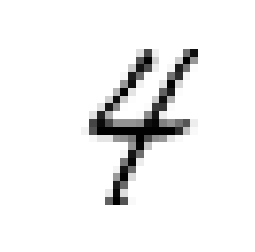

In [26]:
rand_index = np.random.randint(0, 10000)
prediction = classifier.predict([X_test[rand_index]])
print("Sample ", rand_index, ":")
print("Predicted Label: ", prediction)
print("Actual Label (binary): ", y_test_5[rand_index])
print("Actual Label (multi-class): ", y_test[rand_index])
plt.imshow(X_test[rand_index].reshape(28,28), cmap='Greys')
plt.axis('off')
plt.show()

Wow, it worked!! Or maybe it didn't. Either way, one example from the test set doesn't tell us much, and we isolated 10,000 instances for a reason. Fortunately, we can run predict() on the entire test set and get back an array of 10,000 predicted labels. Using that, we can really evaluate how effective our model is.

In [28]:
from sklearn.metrics import accuracy_score

y_test_5_pred = classifier.predict(X_test)
score = accuracy_score(y_test_5, y_test_5_pred)
print(score)

0.9701


Wow, that's a great score! Guess our simple model did pretty well on it's own? Not quite.

Just because we are doing a binary classification task doesn't mean that our data is split evenly into two classes! In this case, only 10% of the samples are in the 'five' class, and the rest are 'not five', *so a model that spits out [ False ] Every time would have 90% accuracy!*

We can't rely on a single metric to evaluate our model. We have 97% precision, but at what *recall*?